<a href="https://colab.research.google.com/github/VidushiRastogi300/task-7/blob/main/Reliance_Sales_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

conn = sqlite3.connect(":memory:")

conn.execute("""
CREATE TABLE reliance_sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price_per_unit REAL
)
""")


In [5]:

sales_data = [
    ('Jio SIM', 50, 0),
    ('Jio Phone', 20, 999),
    ('JioFiber Plan', 15, 799),
    ('Set-Top Box', 10, 1499),
    ('JioPhone', 25, 999),
    ('Jio SIM', 100, 0),
    ('JioFiber Plan', 20, 799)
]

conn.executemany("""
INSERT INTO reliance_sales (product, quantity, price_per_unit)
VALUES (?, ?, ?)
""", sales_data)

conn.commit()


In [7]:

query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price_per_unit) AS total_revenue
FROM reliance_sales
GROUP BY product
"""


summary_df = pd.read_sql_query(query, conn)


print(" Reliance Sales Summary:\n")
print(summary_df)


 Reliance Sales Summary:

         product  total_quantity  total_revenue
0      Jio Phone              40        39960.0
1        Jio SIM             300            0.0
2  JioFiber Plan              70        55930.0
3       JioPhone              50        49950.0
4    Set-Top Box              20        29980.0


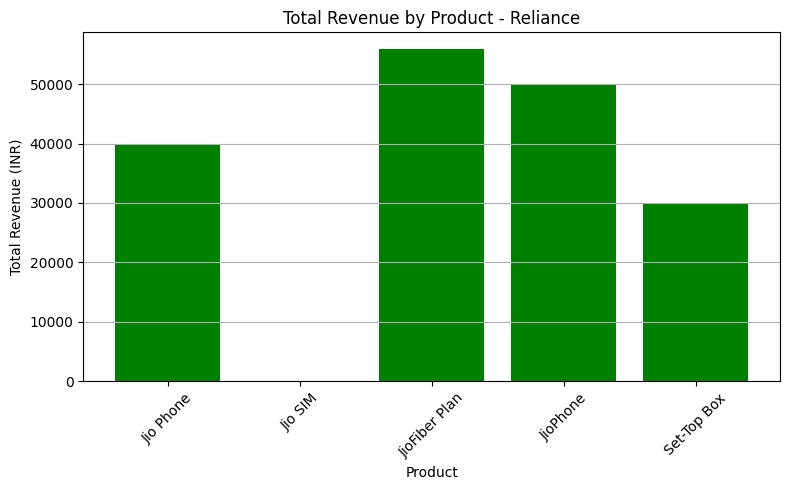

In [8]:

plt.figure(figsize=(8, 5))
plt.bar(summary_df['product'], summary_df['total_revenue'], color='green')
plt.title('Total Revenue by Product - Reliance')
plt.xlabel('Product')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


# *Insights from the Bar Chart*

Jio SIM- Despite being free, the Jio SIM has the highest quantity sold, indicating a strong customer acquisition strategy.

JioPhone and JioFiber Plan- These products show significant revenue, suggesting that customers are willing to invest in bundled services.

Set-Top Box- Although it has a higher unit price, the lower quantity sold results in comparatively lower revenue.

These insights can help Reliance identify high-performing products and areas where marketing or promotional efforts could be intensified.